In [2]:
import numpy as np
from numpy.linalg import norm
from scipy.sparse import diags, csr_matrix
from scipy.sparse.linalg import spsolve, norm #, inv, eigsh
from scipy import integrate

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import rc
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import animation # animaciones
from IPython.display import HTML # ver animaciones en notebook

import scipy as sp
import scipy.sparse as spsp
import scipy.sparse.linalg as spl

import pandas as pd

from scipy import integrate

import cmath
import cmath as cm


#from celluloid import Camera #pip install celluloid si es que no lo tienen. 

*Universidad de Chile*  
*Facultad de Ciencias Físicas y Matemáticas*  
*Departamento de Ingeniería Matemática*

**MA5307-1 Análisis Numérico de EDP: Teoría y Laboratorio**  
**Profesor:** Axel Osses  
**Auxiliares:** Nicolás Barnafi, Sebastián Tapia, Tomás Banduc

# Ecuación de Schrödinger

El objetivo de este trabajo es aplicar el método de diferencias finitas en varias variables la resolución de la ecuación de Schrödinger. 

La ecuación de Schrödinger se formula como

$$
i \hbar \frac{\partial}{\partial t} \Psi (x,t) = \hat{H} \Psi(x,t) := [-\frac{\hbar^2}{2m} \nabla ^2 + V(x,t)] \Psi(x,t)
$$

Donde $\hat{H}$ es el operador Hamiltoniano que expresa la energía total del sistema mediante la suma de las energías cinéticas $\hat{T}$ y potenciales $\hat{V}$ de un sistema físico $(\hat{H} = \hat{T} + \hat{V})$, $m$ es la masa de la partícula, $V (x,t)$ es el potencial que representa el entorno en el cual la partícula existe, $i$ es la unidad imaginaria, y $\hbar$ es la constante de Planck reducida, que tiene unidades de acción (energía por tiempo).

Para resolver la ecuación de Schodinger en una dimensión, usamos el método de variables separables, suponemos que $\Psi(x,t) = \phi(t) \psi(x)$, entonces

$$
i \hbar \psi(x) \frac{\partial}{\partial t}  \phi(t) = [-\frac{\hbar^2}{2m} \nabla ^2 + V(x,t)] \psi(x) \phi(t)
$$

De donde deducimos que 

$$
i \hbar \frac{\partial \phi}{\partial t} (t) \frac{1}{\phi(t)} = -  \frac{\hbar^2}{2m}\frac{\partial ^2 \psi}{\partial x ^2} (x) \frac{1}{\phi(x)} + V(x,t)
$$

Suponiendo que el potencial en donde se mueve la partícula no depende del tiempo, i.e, $V(x,t) = V(x)$.

$$
i \hbar \frac{\partial \phi}{\partial t} (t) \frac{1}{\phi(t)} = - \frac{\hbar^2}{2m} \frac{\partial ^2 \psi}{\partial x^2}(x) \frac{1}{\psi (x)} + V(x)
$$

Donde notamos que el lado izquierdo la ecuación depende solo del tiempo y el lado derecho solo del espacio.

Luego, existe una constante $E$ para la cual se cumple
    
$$
i \hbar \frac{\partial}{\partial t} (\phi(t)) \frac{1}{\phi (t)} = E 
$$
$$
- \frac{\hbar^2}{2m} \frac{\partial ^2}{\partial x^2}(\psi(x)) \frac{1}{\psi (x)} + V(x) = E
$$

Se verifica que $E$ tiene dimensiones de energía.

La primera ecuación puede resolverse y obtener una solución de la forma $\phi(t) = e^{- \frac{iE}{\hbar} t}$, que depende del valor de E el cual se trabaja a partir de la segunda ecuación.

## Autovalores de energía

De la segunda ecuación, deducimos el problema 

$$
- \frac{\hbar^2}{2m} \frac{\partial ^2}{\partial x^2} (\psi(x)) + V(x) \psi(x) = E \psi (x)
$$

$$ 
[- \frac{\hbar^2}{2m} \frac{\partial ^2}{\partial x^2} + V(x)] \psi(x) = E \psi (x)
$$

$$ 
\hat{H} \psi(x) = E \psi(x)
$$

Que se corresponde a un problema de autovalores para el operador lineal $\hat{H}$ sobre $\psi$

A partir de esta formulación, se realizan aproximaciones de la solución para el caso unidimensional discretizando un intervalo $\Omega = [a,b]$ con condiciones iniciales $\psi(a)=\psi(b)=0$ con el fin de simular una particula encerrada en dicho entorno, de esta forma podemos encontrar valores propios $E$ y vectores propios $\psi(x)$ asociados a la matriz obtenida del operador Hamiltoniano para la discretización de la malla que solucionan el sistema de ecuaciones asociados a la discretización, buscamos aproximar soluciones $\psi \in L^2(\Omega, \mathbb{C})$

Posterior a esto podemos estudiar la evolución temporal de estas soluciones aplicando diferencias finitas


## Caso 1: Resolución de la ecuación de Schrödinger independiente del tiempo

Sea un intervalo acotado $\Omega=\left[  a,b\right]  \subseteq\mathbb{R}$ . Considere la ecuación de Schrodinger independiente del tiempo como el problema de valores propios: 

$$ 
\hat{H} \psi(x) = E \psi(x)
$$

Equivalentemente
$$
\begin{aligned}
\begin{aligned}
-\frac{\hbar^2}{2m}\dfrac{\partial^2 \Psi(x)}{\partial x^2}+ V(x)\Psi(x)=
E \Psi(x) \\ 

\end{aligned} 
\end{aligned}
$$

Por simplicidad tomamos $m=1$ y $\hbar = 1$, considerando una malla $(x_i)_{i=0}^{j=N+1}$ de $N+2$ puntos sobre el intervalo $\Omega = [a,b]$ tal que $x_0=a$ y $x_N = b$, de manera que tenemos las condiciones iniciales $\Psi_0 = 0$ y $\Psi_N = 0$.

Considerando la aproximación centrada para la segunda derivada

$$
\frac{\partial^2 \Psi}{\partial x ^2} (x_i) \approx \frac{\Psi(x_{i+1}) - 2 \Psi (x_i) + \Psi(x_{i-1})}{\Delta x ^2} \ \ \forall i \in \{ 1, \dots, N\}
$$

Aplicando la identidad anterior a todo $i \in \{ 1, \dots, N\}$, buscamos resolver un sistema lineal para $(\Psi_i)_{i=1}^{N}$, al imponer las condiciones iniciales se llega al sistema

$$ 
(-\frac{1}{2 \Delta x ^2} \begin{pmatrix}
-2 & 1 & 0 & \dots & 0 \\
1 & -2 & 1 & \ddots & \vdots \\
0 & 1 & \ddots & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & 1 \\
0 & \dots & 0 & 1 & -2 
\end{pmatrix} + 

\begin{pmatrix}
V_1 & 0 & 0 & \dots & 0 \\
0 & V_2 & 0 & \ddots & \vdots \\
0 & 0 & \ddots & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & 0 \\
0 & \dots & 0 & 0 & V_{N} 
\end{pmatrix})

\begin{bmatrix} \Psi_1 \\ \Psi_2 \\ \vdots \\ \Psi_{N} \end{bmatrix} = E \begin{bmatrix} \Psi_1 \\ \Psi_2 \\ \vdots \\ \Psi_{N} \end{bmatrix}
$$

Denotando 

$$
H =
-\frac{1}{2 \Delta x ^2} \begin{pmatrix}
-2 & 1 & 0 & \dots & 0 \\
1 & -2 & 1 & \ddots & \vdots \\
0 & 1 & \ddots & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & 1 \\
0 & \dots & 0 & 1 & -2 
\end{pmatrix} + 

\begin{pmatrix}
V_1 & 0 & 0 & \dots & 0 \\
0 & V_2 & 0 & \ddots & \vdots \\
0 & 0 & \ddots & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & 0 \\
0 & \dots & 0 & 0 & V_{N} 
\end{pmatrix}
$$

Nos centramos en estudiar los valores y vectores propios de $H$


In [3]:
def solve_schrodinger_0(N,U,a,b, disp_U = False, disp_fun = None, fig_size = (12,8)):
    """
    Resolución numérica del problema de autovalores de la 
    ecuación de Schrodinger independiente del tiempo.
    --------
    Input:
    - N: int
        Número de puntos internos a discretizar el intervalo [a,b]
    - U: function
        Función que recibe array-like, describe el potencial del entorno
    - a,b: float
        Extremos del intervalo a estudiar. Default a=0, b=1 ==> intervalo a estudiar es [0,1]
    - disp_U: bool
        Despliega una gráfica con el potencial del entorno en el que se encuentra la partícula, en el intervalo [a,b]
    - disp_fun: array or list
        Grafíca los autovectores (soluciones) del problema cuyos indices estén
        en el array/lista dados. Si None, no grafica nada. 
    --------
    Output:
    - x: array
        Intervalo (discretizado) donde se resuelve la ecuación.
    - eigenvalues: array
        Numpy array con los autovalores del operador H de la ecuación de Schrodinger
    - eigenvectors:
        Numpy array (matrix) con filas de vectores propios asociados a los autovalores dados por eigenvalues
    - fig_size: túpla 
        Una túpla de tamaño 2 con las dimensiones del gráfico (si se desea graficar) 
    --------
    """

    #Discretizamos el espacio
    x=np.linspace(a,b,N+2)
    dx = x[1]-x[0]
    
    #Definimos la subrutina que resuelva el problema de autovalores
    def solve_schrodinger_eq(H):
        eigenvalues, eigenvectors = np.linalg.eigh(H)
        return eigenvalues, eigenvectors

    #Creamos las matrices de energía cinética (Laplaciano), 
    #potencial del entorno (V) y Hamiltoniano (H) dados por la ecuación:
    
    e = np.ones(N) 
    f = np.ones(N-1)
    k = np.array([f,-2*e,f], dtype= object) #Lista con los vectores
    offset = [-1,0,1] #Posiciones respecto a la diagonal en que se ubicarán los vectores

    laplaciano = sp.sparse.diags(k,offset).todense() #Definir matriz sparse diagonal
    
    Ux=U(x[1:-1])
    V = sp.sparse.diags(Ux).todense() #Definir matriz sparse diagonal

    #Definimos el Hamiltoniano
    H = -laplaciano/(2*dx**2) + V

    #Soluciones para el sistema lineal usando subrutina definida anteriormente
    eigenvalues, eigenvectors = solve_schrodinger_eq(H)
    
    #Vectores propios vienen como matriz, donde cada uno es una columna

    #Añadimos a cada vector propio las condiciones de borde agregando una fila de ceros para la primera y última fila
    eigenvectors = np.vstack((np.zeros(eigenvectors.shape[1]), eigenvectors))
    eigenvectors = np.vstack((eigenvectors, np.zeros(eigenvectors.shape[1])))

    # Plot del potencial en el que se encuentra la particula
    if disp_U:
        plt.figure(figsize=fig_size)
        plt.plot(x, U(x), label = 'Potencial del entorno', color ='black', linestyle ='dashed', linewidth = 2)
        plt.title("Autovectores de la ecuación de Schrödinger y potencial del entorno")
        plt.xlabel("x")
        plt.ylabel("V(x)")
        plt.title("Potencial del entorno")
        plt.grid(True)
        plt.legend(loc="lower right")
        plt.show()

    # Plot de los vectores propios del Hamiltoniano
    if disp_fun!=None:
        plt.figure(figsize=fig_size)
        index = disp_fun
        for i in index:
            plt.plot(x, eigenvectors[:, i], label=f"Autovector {i+1}, Autovalor: {eigenvalues[i]}")
        plt.xlabel("x")
        plt.ylabel("Autovector")
        plt.title("Autovectores de la ecuación de Schrödinger")
        plt.grid(True)
        plt.legend(loc="lower right")
        plt.show()

    return x, eigenvalues, eigenvectors



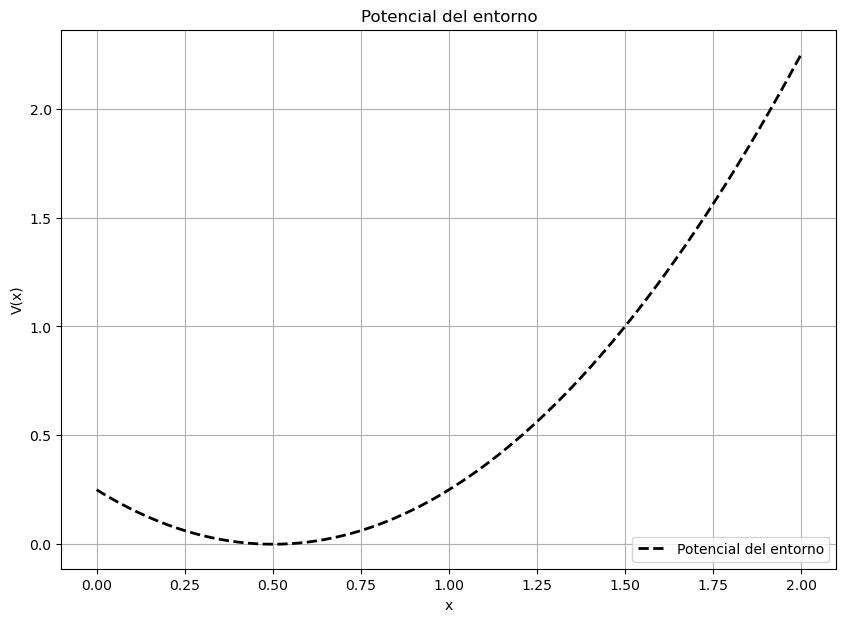

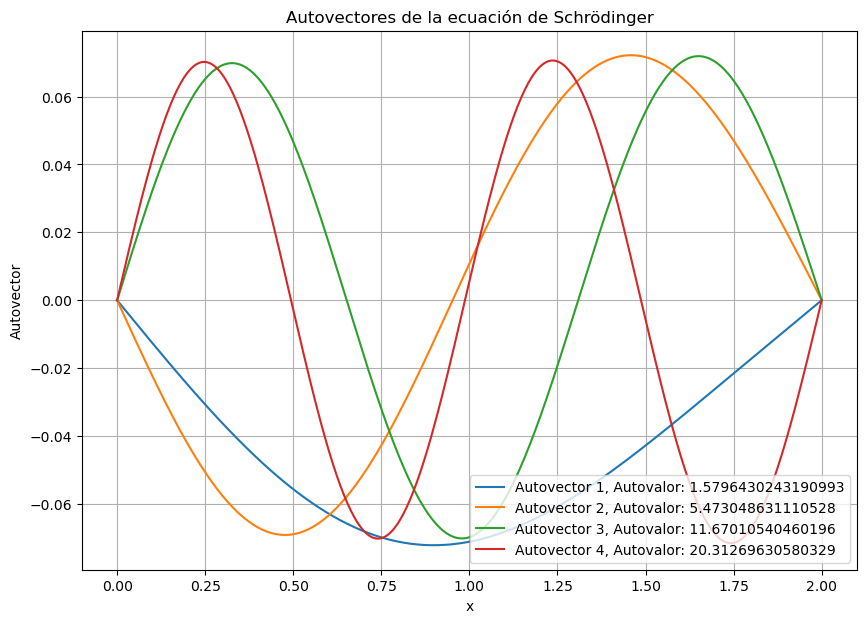

In [4]:
#Caso con potencial cuadrático
U= lambda x: (x-0.5)**2 

#Gráfica del potencial del entorno y los primeros 4 autovectores en este escenario
x, eigenvalues, eigenvectors = solve_schrodinger_0(400,U, 0,2, disp_U = True, disp_fun = [0,1,2,3], fig_size=(10,7))

### Potencial tipo barreras y pozos
Ahora, veamos que ocurre con potenciales del estilo barrera, dadas por funciones del estilo 
$$
U(x)=\begin{cases}0 & \text{si } x\in(0,a)\cup (b,1)\\ U_0 & \text{si }x\in(a,b)\\ \end{cases}
$$
donde $a,b\in(0,1),\ a< b$, y con $U_0\in\mathbb{R}_{>0}$ algún valor positivo, el cual representa la altura de la barrera. 
En la siguiente celda, se prueba el caso con la barrera de altura $U_0=10$ ubicada entre $a=0.4$ y $b=0.6$, pero se definen otros entornos donde la barrera está desplazadas o con varias barreras. 


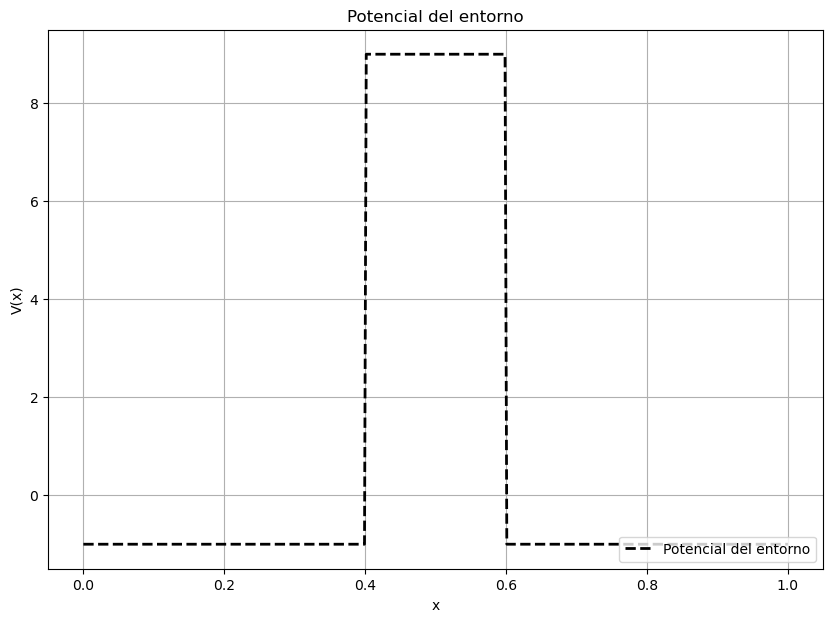

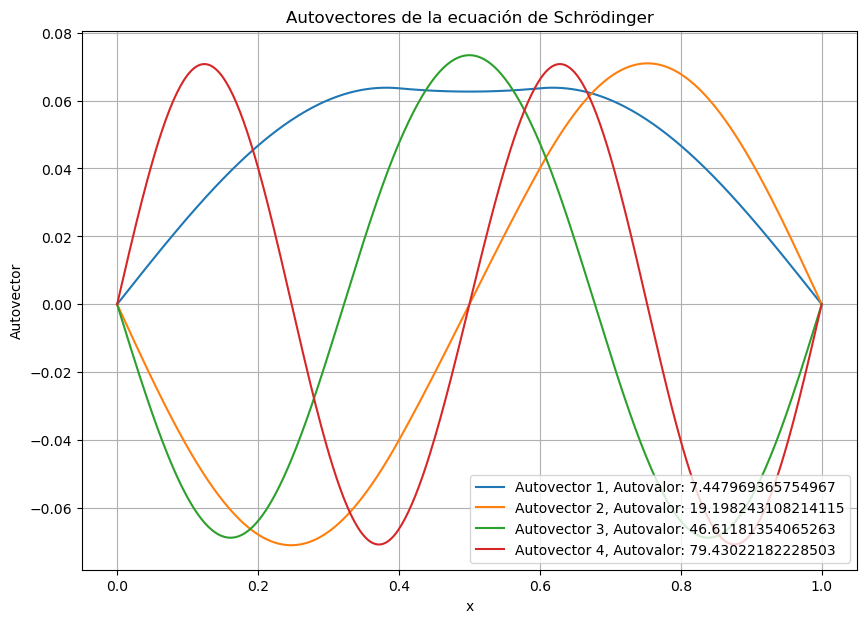

In [5]:
#Caso del potencial tipo "barrera" en el centro
def U_bar(t, U_0=10, a=0.4, b=0.6):
    return + U_0*np.heaviside(t-a,1)-U_0*np.heaviside(t-b,1) -1

#Caso del potencial con una barrera a la izquierda del intervalo
def U_bar_desp(t, U_0=10):
    return  U_0*np.heaviside(t-0.1,1)-U_0*np.heaviside(t-0.3,1)-1

#Caso del potencial con cuatro "barreras"
def U_bar4(t, U_0=10):
    return  U_0*np.heaviside(t-0.1,1)-U_0*np.heaviside(t-0.2,1)\
    +  U_0*np.heaviside(t-0.3,1)-U_0*np.heaviside(t-0.4,1)\
    +  U_0*np.heaviside(t-0.6,1)-U_0*np.heaviside(t-0.7,1)\
    +  U_0*np.heaviside(t-0.8,1)-U_0*np.heaviside(t-0.9,1)\
    -1

#Gráfica del potencial del entorno y los primeros 4 autovectores en este escenario
x, eigenvalues, eigenvectors = solve_schrodinger_0(400,U_bar, 0,1,
                                                   disp_U = True, disp_fun = [0,1,2,3], fig_size=(10,7))

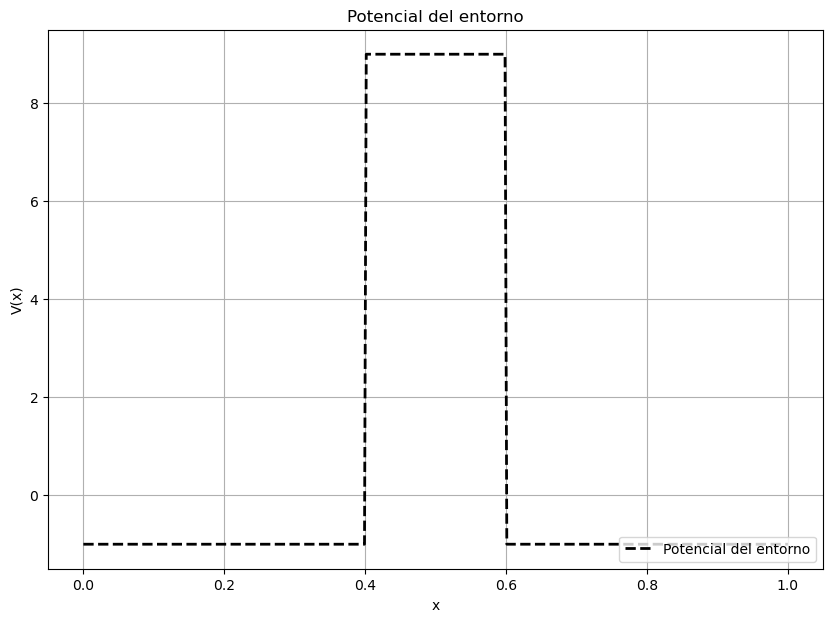

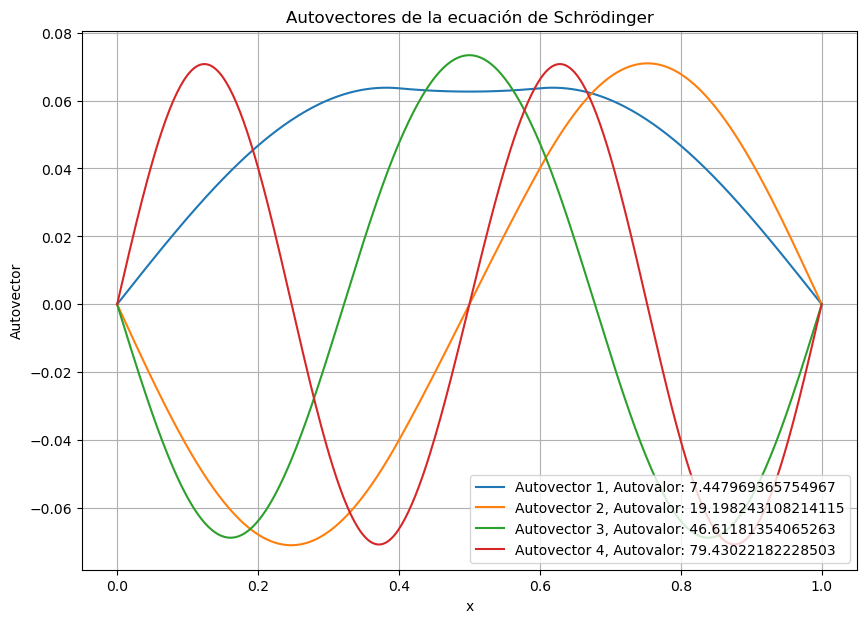

In [6]:
#Caso del potencial tipo "barrera" en el centro
def U_bar(t, U_0=10, a=0.4, b=0.6):
    return + U_0*np.heaviside(t-a,1)-U_0*np.heaviside(t-b,1) -1

#Caso del potencial con una barrera a la izquierda del intervalo
def U_bar_desp(t, U_0=10):
    return  U_0*np.heaviside(t-0.1,1)-U_0*np.heaviside(t-0.3,1)-1

#Caso del potencial con cuatro "barreras"
def U_bar4(t, U_0=10):
    return  U_0*np.heaviside(t-0.1,1)-U_0*np.heaviside(t-0.2,1)\
    +  U_0*np.heaviside(t-0.3,1)-U_0*np.heaviside(t-0.4,1)\
    +  U_0*np.heaviside(t-0.6,1)-U_0*np.heaviside(t-0.7,1)\
    +  U_0*np.heaviside(t-0.8,1)-U_0*np.heaviside(t-0.9,1)\
    -1

#Gráfica del potencial del entorno y los primeros 4 autovectores en este escenario
x, eigenvalues, eigenvectors = solve_schrodinger_0(400,U_bar, 0,1,
                                                   disp_U = True, disp_fun = [0,1,2,3], fig_size=(10,7))

### Potencial tipo pozo gaussiano
Ahora, veamos que ocurre en el entorno donde existe un pozo de profundidad $U_0$, dado por la función
$$
U(x)=-U_0\exp(\frac{-|x-\bar{x}|^2}{2\sigma^2})
$$ 

donde $\bar{x}$ es la ubicación del centro del pozo, y $\sigma^2$ determina el "ancho" del pozo. 
En esta ocación veremos qué ocurre con un pozo "profundo" ($U_0=100$) ubicado a la derecha ($\bar{x}=0.8$ y $\sigma^2=500$).


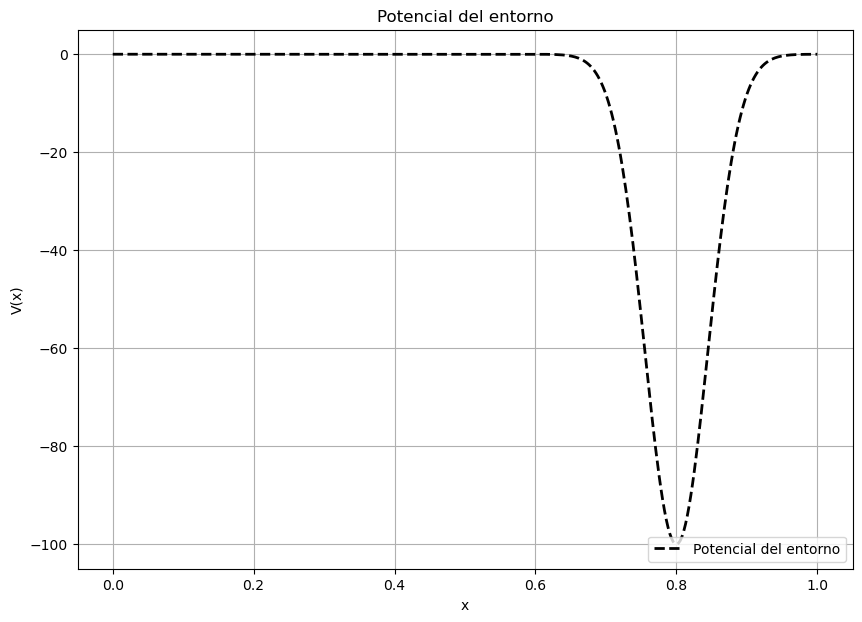

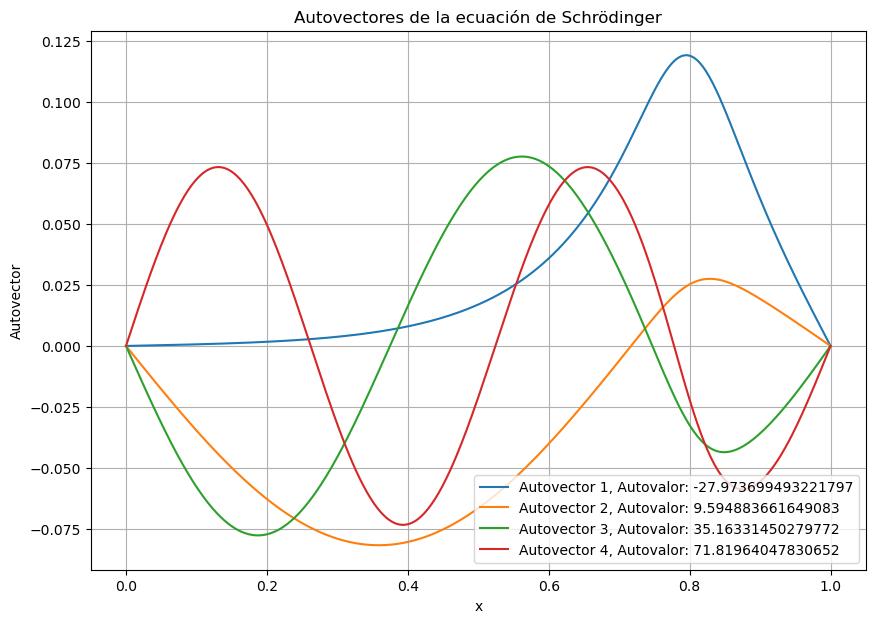

In [7]:
#Caso con pozo gaussiano a la derecha del intervalo
U0=100
x_bar=0.8
sigma2=500
def U_gaus(t):
    return -U0*np.exp(-(np.abs(t-x_bar)**2)/2*sigma2)

x, eigenvalues, eigenvectors = solve_schrodinger_0(400,U_gaus,0,1, disp_U = True, disp_fun = [0,1,2,3], fig_size=(10,7))

En el contexto de la ecuación de Schrödinger, los autovalores obtenidos representan los valores de energía permitidos en el sistema físico en estudio. Cada autovalor $E_n$ está asociado a un autovector, que en este caso son las funciones de onda $\Psi(x)$ correspondientes a las diferentes energías permitidas, dichos autovectores resuelven el sistema lineal que aproxima la ecuación de Schrödinger independiente del tiempo.

Debe pasar que la funciones de ondas obtenidas como autovectores de la matriz H deben cumplir que $\int_{a}^{b}|\Psi_i(x)|^2 dx = 1$, pues $|\Psi_i(x)|^2$ representa una densidad de probabilidad sobre la región.

In [8]:
#Cálculo de la norma L2 de los autovectores, la función |\Psi|**2 debe representar una densidad de probabilidad
#Consideramos los primeros N autovectores
N=15
for i in range(N):
    a=eigenvectors[:, i]
    print("La norma L2 para el vector propio N =", i, ":", np.linalg.norm(a))

La norma L2 para el vector propio N = 0 : 1.0000000000000002
La norma L2 para el vector propio N = 1 : 0.9999999999999993
La norma L2 para el vector propio N = 2 : 1.0000000000000004
La norma L2 para el vector propio N = 3 : 1.0000000000000007
La norma L2 para el vector propio N = 4 : 1.0
La norma L2 para el vector propio N = 5 : 1.0000000000000002
La norma L2 para el vector propio N = 6 : 1.0000000000000002
La norma L2 para el vector propio N = 7 : 0.9999999999999993
La norma L2 para el vector propio N = 8 : 0.9999999999999994
La norma L2 para el vector propio N = 9 : 1.0000000000000002
La norma L2 para el vector propio N = 10 : 1.0000000000000002
La norma L2 para el vector propio N = 11 : 1.0000000000000002
La norma L2 para el vector propio N = 12 : 0.9999999999999996
La norma L2 para el vector propio N = 13 : 0.9999999999999998
La norma L2 para el vector propio N = 14 : 1.0000000000000007


Notamos que cada uno de los autovectores $\Psi_i(x)$ cumplen tener la misma integral $\int_{a}^{b}|\Psi_i(x)|^2 dx$

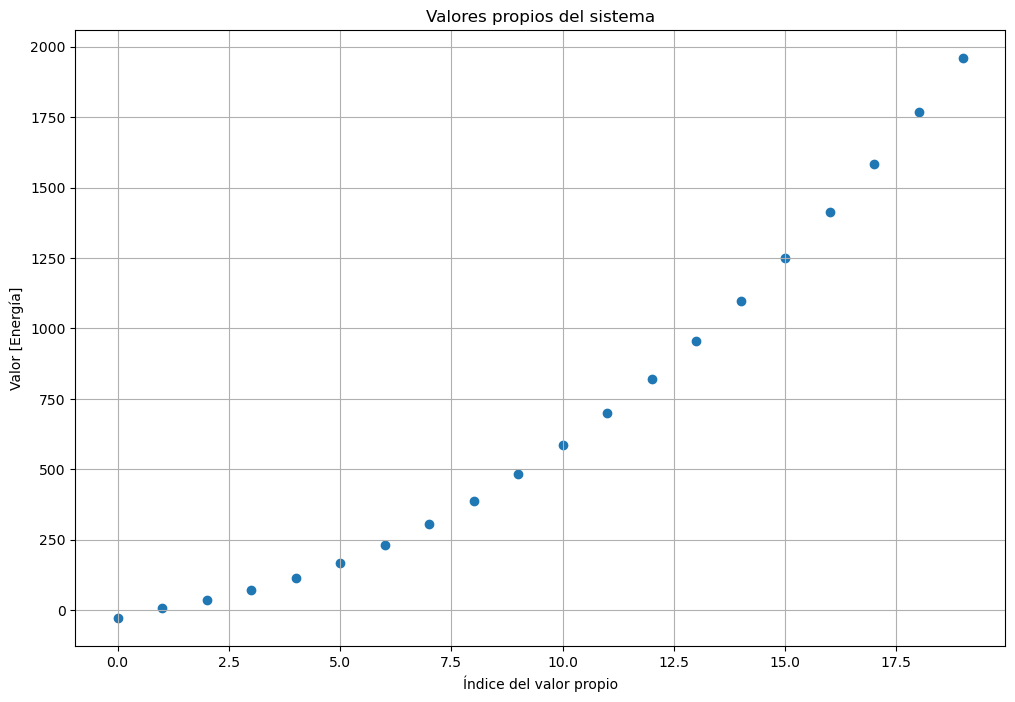

In [9]:
# Plot de los primeros N valores propios
N = 20
plt.figure(figsize=(12, 8))
plt.scatter(np.arange(N), eigenvalues[:N])
plt.xlabel("Índice del valor propio")
plt.ylabel("Valor [Energía]")
plt.title(f"Valores propios del sistema")
plt.grid(True)
plt.show()

## Caso 2: Evolución temporal de la Ecuación

Consideramos esquemas de evolución para la ecuación de Schrödinger

$$
i \hbar \frac{\partial}{\partial t} \Psi (x,t) = \hat{H} \Psi(x,t) := [-\frac{\hbar^2}{2m} \nabla ^2 + V(x)] \Psi(x,t)
$$

#### Esquema Explícito

$$
\begin{aligned}
i\frac{\Psi^{n+1}_j-\Psi^n_j }{\Delta t}= -\frac{\Psi_{j+1}^n -2\Psi_j^n + \Psi^n_{j-1}}{2\Delta x^2}+ V_j\Psi_j^n \ \ \forall j \in \{1,...,N\}\\ 
\end{aligned}
$$

#### Esquema Implícito

$$
\begin{aligned}
i\frac{\Psi^{n+1}_j-\Psi^n_j }{\Delta t}= -\frac{\Psi_{j+1}^{n+1} -2\Psi_j^{n+1} + \Psi^{n+1}_{j-1}}{2\Delta x^2}+ V_j\Psi_j^{n+1} \ \ \forall j \in \{1,...,N\}\\ 
\end{aligned}
$$

#### Esquema Crank-Nicolson: (Combinación convexa $\theta = \frac{1}{2}$)

$$
\begin{aligned}
i\frac{\Psi^{n+1}_j-\Psi^n_j }{\Delta t} + \frac{1}{2}(\frac{\Psi_{j+1}^{n+1} -2\Psi_j^{n+1} + \Psi^{n+1}_{j-1}}{2\Delta x^2} - V_j\Psi_j^{n+1}) + \frac{1}{2} (\frac{\Psi_{j+1}^n -2\Psi_j^n + \Psi^n_{j-1}}{2\Delta x^2}- V_j\Psi_j^n) = 0 \ \ \forall j \in \{1,...,N\}\\ 
\end{aligned}
$$

$$\iff$$

$$
\begin{aligned}
i\frac{\Psi^{n+1}_j}{\Delta t} + \frac{1}{2}(\frac{\Psi_{j+1}^{n+1} -2\Psi_j^{n+1} + \Psi^{n+1}_{j-1}}{2\Delta x^2}) - \frac{1}{2} V_j\Psi_j^{n+1} = i \frac{\Psi_j^{n}}{\Delta t}- \frac{1}{2} (\frac{\Psi_{j+1}^n -2\Psi_j^n +\Psi^n_{j-1}}{2\Delta x^2}) + \frac{1}{2} V_j\Psi_j^n \ \ \forall j \in \{1,...,N\}\\ 
\end{aligned}
$$

$$\iff  \forall j \in \{1,...,N\}$$

$$
\begin{aligned}
\frac{i}{\Delta t} \Psi_j^{n+1} + \frac{1}{4 \Delta x ^2}(\Psi_{j+1}^{n+1} -2 \Psi_{j}^{n+1} + \Psi_{j-1}^{n+1}) - \frac{1}{2} V_j \Psi_j^{n+1} = \frac{i}{\Delta t} \Psi_{j}^n - \frac{1}{4 \Delta x^2} (\Psi_{j+1}^n - 2\Psi_{j}^n + \Psi_{j-1}^n) + \frac{1}{2} V_j \Psi_{j}^{n}  
\end{aligned}
$$

Considerando $c = \frac{1}{4 \Delta x^2}$ podemos escribir el sistema de ecuaciones como

$$ 
\frac{i}{\Delta t} I \Psi^{n+1} + c \begin{pmatrix}
-2 & 1 & 0 & \dots & 0 \\
1 & -2 & 1 & \ddots & \vdots \\
0 & 1 & \ddots & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & 1 \\
0 & \dots & 0 & 1 & -2 
\end{pmatrix} \Psi^{n+1} - \frac{1}{2} \begin{pmatrix}
V_1 & 0 & 0 & \dots & 0 \\
0 & V_2 & 0 & \ddots & \vdots \\
0 & 0 & \ddots & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & 0 \\
0 & \dots & 0 & 0 & V_{N} 
\end{pmatrix} \Psi^{N+1}
$$

$$
= \frac{i}{\Delta t} I \Psi^{n} - c \begin{pmatrix}
-2 & 1 & 0 & \dots & 0 \\
1 & -2 & 1 & \ddots & \vdots \\
0 & 1 & \ddots & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & 1 \\
0 & \dots & 0 & 1 & -2 
\end{pmatrix} \Psi^{n} + \frac{1}{2} \begin{pmatrix}
V_1 & 0 & 0 & \dots & 0 \\
0 & V_2 & 0 & \ddots & \vdots \\
0 & 0 & \ddots & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & 0 \\
0 & \dots & 0 & 0 & V_{N} 
\end{pmatrix} \Psi^{N}
$$

Escribiendo entonces

$$ 
M = \begin{pmatrix}
-2 & 1 & 0 & \dots & 0 \\
1 & -2 & 1 & \ddots & \vdots \\
0 & 1 & \ddots & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & 1 \\
0 & \dots & 0 & 1 & -2 
\end{pmatrix}



V = \begin{pmatrix}
V_1 & 0 & 0 & \dots & 0 \\
0 & V_2 & 0 & \ddots & \vdots \\
0 & 0 & \ddots & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & 0 \\
0 & \dots & 0 & 0 & V_{N} 
\end{pmatrix}
$$

Tenemos el sistema de ecuaciones

$$
(\frac{i}{\Delta t} I + cM - \frac{1}{2} V) \Psi^{n+1} = (\frac{i}{\Delta t} I - cM + \frac{1}{2} V) \Psi^n
$$

Considerando entonces
$$
A = (\frac{i}{\Delta t} I + cM - \frac{1}{2} V) 
;
b = (\frac{i}{\Delta t} I - cM + \frac{1}{2} V) \Psi^n
$$

Debemos resolver el problema

$$
A \Psi^{n+1} = b
\ \ \text{donde} \ 
\Psi^{n+1} = \begin{bmatrix} \Psi_1^{n+1} \\ \Psi_2^{n+2} \\ \vdots \\ \Psi_{N}^{n+1} \end{bmatrix}
$$

Sujeto a las condiciones 

$$
\Psi_{0}^n = \Psi_{N+1}^n = 0 \ \ \forall n \in \{0, \dots, NT\}
$$

In [41]:
import cmath

def solve_schrodinger_iter(psi_iter,A,B):
    b = B.dot(psi_iter)
    b = np.ravel(b)
    psi = np.linalg.solve(A,b)
    return psi

def solve_schrodinger_time(psi0, Nx, NT, U, L):
    #Setting 
    x = np.linspace(0, L, Nx+2)
    dx = x[1] - x[0]
    dt = 0.05
    
    #Definimos las matrices
    e = np.ones(Nx) #Este comando define un vector de largo n lleno de 1's.
    f = np.ones(Nx-1)
    k = np.array([f,-2*e,f], dtype= object) #Lista con los vectores
    offset = [-1,0,1] #Posiciones respecto a la diagonal en que se ubicarán los vectores
    I = sp.sparse.diags(e)
    M = sp.sparse.diags(k,offset) #Definir matriz sparse diagonal
    V = U(x[1:-1])
    V = sp.sparse.diags(V)

    #Matrices para el sistema
    c = 1/((4*dx)**2) #cte
    A=(((1j)/dt)*I + c*M - (1/2)*V).todense()
    B= (((1j)/dt)*I - c*M + (1/2)*V).todense()
    
    #Definimos la Matriz de la solución temporal del sistema
    psiMatrix = np.zeros([NT+1,Nx], dtype=complex)
    psiMatrix[0,:] = psi0 #Condición inicial
    print("Loading...%")
    for n in range(NT-1):
        psiMatrix[n+1, :] = solve_schrodinger_iter(psiMatrix[n, :], A, B)
        percentage= (n/NT)*100
        print("{}".format(percentage),end='\r')
        

    zero_column = np.zeros((psiMatrix.shape[0], 1), dtype=complex) #Condicion inicial \Psi(t,0)=\Psi(t,1)=0
    psiMatrix = np.hstack((zero_column, psiMatrix, zero_column))
    return psiMatrix

In [33]:
#Funciones auxiliares para visualización de densidad de probabilidad
def calcular_integral(x, y):
    integral = np.trapz(y, x)
    return integral

def normaliza_Schrodinger_prob(psiMatrix, L):
    Schrodinger_prob = np.abs(psiMatrix)**2
    Nx = len(psiMatrix[0, :])
    for i in range(len(psiMatrix[:,0])):
        x_values = np.linspace(0, L, Nx)
        integral = calcular_integral(x_values, Schrodinger_prob[i, :])
        Schrodinger_prob[i, :] = (1/integral)*Schrodinger_prob[i, :]
    return Schrodinger_prob

def normaliza_psi0(psi, L):
    Nx = len(psi0)
    psi_prob = np.abs(psi)**2
    x_values = np.linspace(0,L,Nx)
    integral = calcular_integral(x_values, psi)
    psi = (1/integral)*psi
    return psi

#Plotea Array de valores complejos
def plot_complexpsi0(psi0, L):
    Nx = len(psi0)
    x_values = np.linspace(0,L,Nx)
    #Plot de la parte real
    plt.plot(x_values, np.real(psi0), label='Parte Real')

    # Plot de la parte imaginaria
    plt.plot(x_values, np.imag(psi0), label='Parte Imaginaria')
    plt.xlabel('x')
    plt.ylabel('$\Psi(x,t=0)$')
    plt.title('Plot de $\Psi(x,t=0)$')
    plt.legend()
    plt.show()

In [42]:
def animar_soluciones(psiMatrix, potencial, L, nombre_archivo):
    # Crea figura y subtramas
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10, 8))

    # Configuración de la subtrama para la animación de las soluciones
    Nx = len(psiMatrix[0, :])
    NT = len(psiMatrix[:, 0])
    x_values = np.linspace(0, L, Nx)

    #Soluciones de la ecuación
    Schrodinger_real = np.real(psiMatrix)
    Schrodinger_imag = np.imag(psiMatrix)
    Schrodinger_prob = normaliza_Schrodinger_prob(psiMatrix, L)

    line1, = ax1.plot(x_values, Schrodinger_real[0, :], label='$\Re(\Psi(x,t))$', color='r')
    line2, = ax1.plot(x_values, Schrodinger_imag[0, :], label='$\Im(\Psi(x,t))$', color='b')
    ax1.set_ylim(-1.1 * np.max(np.abs(psiMatrix)), 1.1 * np.max(np.abs(psiMatrix)))
    ax1.set_xlabel('x')
    ax1.set_ylabel('Función de Onda $\Psi$')
    ax1.set_title('Evolución temporal de la ecuación de Schrödinger')
    ax1.legend()

    # Configuración de la subtrama para la densidad de probabilidad
    line3, = ax2.plot(x_values, Schrodinger_prob[0, :], label='$|\Psi(x,t)|^2$', color='y')
    ax2.set_ylim(-0.3, 1.1 * np.nanmax(Schrodinger_prob))
    ax2.set_xlabel('x')
    ax2.set_ylabel('Densidad de Probabilidad $|\Psi|^2$')
    ax2.legend()

    # Configuración de la subtrama para el potencial
    potencial = potencial(x_values)
    ax3.plot(x_values, potencial, label = 'V(x)', color='black')
    ax3.set_xlabel('x')
    ax3.set_ylabel('Potencial $V(x)$')
    ax3.set_title('Potencial asociado')

    # Texto para mostrar el paso temporal y la integración
    time_text = ax1.text(0.02, 0.95, '', transform=ax1.transAxes)
    integral_text = ax2.text(0.02, 0.95, '', transform=ax2.transAxes)

    # Variables para almacenar los resultados de la integral en cada iteración
    integrals = []

    # Función para animar
    def animate(i):
        line1.set_data(x_values, Schrodinger_real[i, :])
        line2.set_data(x_values, Schrodinger_imag[i, :])
        line3.set_data(x_values, Schrodinger_prob[i, :])
        time_text.set_text(f'Tiempo = {i}')
        integrals.append(calcular_integral(x_values, Schrodinger_prob[i, :]))
        integral_text.set_text(f'$\int |\Psi(x,t)|^2$ = {integrals[i]}')
        return [line1, line2, line3, time_text, integral_text]

    # Animación
    ani = animation.FuncAnimation(fig, animate, frames=NT, interval=50, blit=True)
    ani.save(nombre_archivo + ".gif")

    return ani

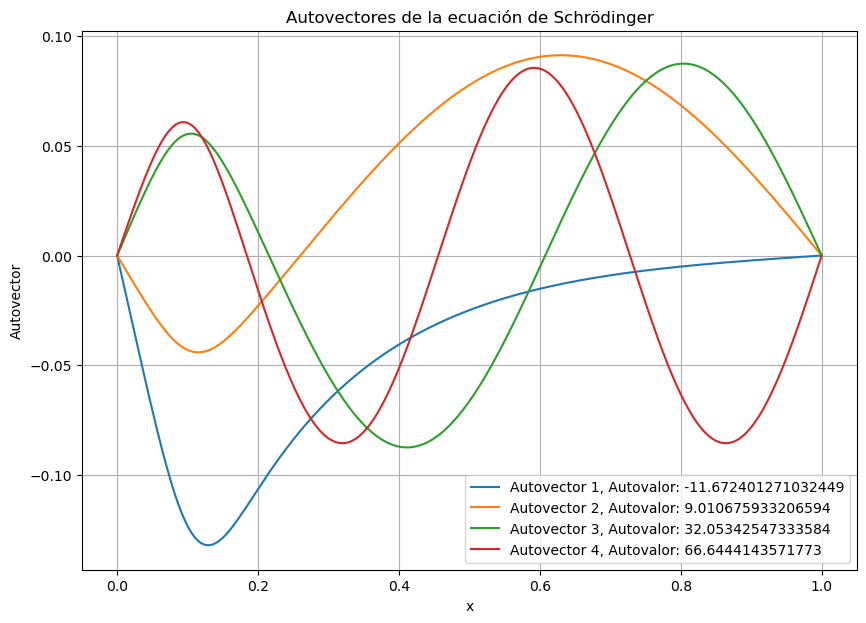

Loading...%


/var/folders/nz/rtdpw7510rz46ybxm78_3rnc0000gn/T/ipykernel_1696/1524684853.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  Schrodinger_prob[i, :] = (1/integral)*Schrodinger_prob[i, :]
/var/folders/nz/rtdpw7510rz46ybxm78_3rnc0000gn/T/ipykernel_1696/1524684853.py:12: RuntimeWarning: invalid value encountered in multiply
  Schrodinger_prob[i, :] = (1/integral)*Schrodinger_prob[i, :]
MovieWriter ffmpeg unavailable; using Pillow instead.


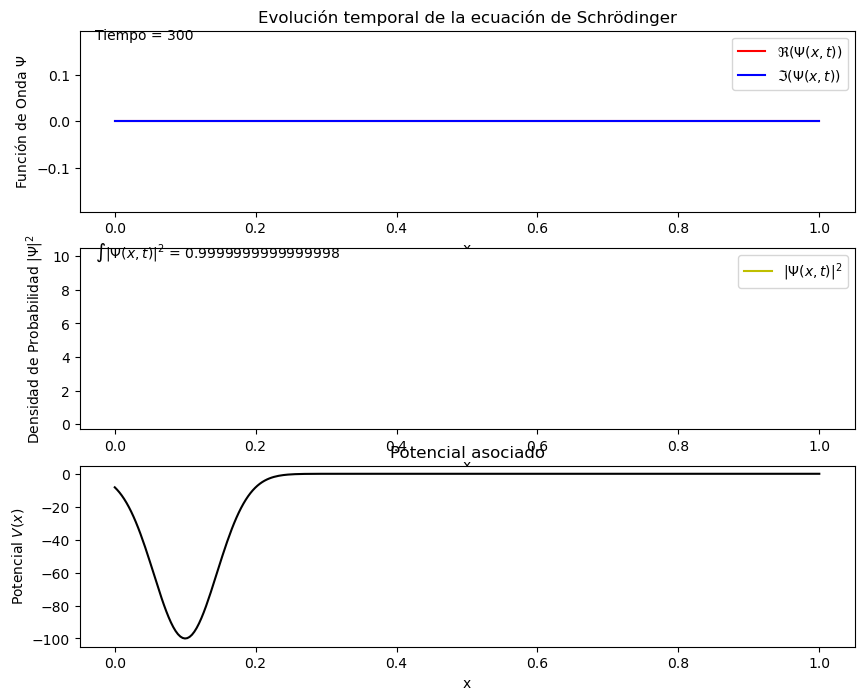

In [47]:
#Simulación caso Gaussiano con psi0 de eigenvectors

#Caso con pozo gaussiano a la derecha del intervalo
U0=100
Nx = 300
NT = 300
x_bar=0.1
sigma2=500
L = 1
def U_gaus(t):
    return -U0*np.exp(-(np.abs(t-x_bar)**2)/2*sigma2)

x, eigenvalues, eigenvectors = solve_schrodinger_0(Nx,U_gaus,0,L, disp_U = False, disp_fun = [0,1,2,3], fig_size=(10,7))

#Creacion de Psi(x,t=0)
WavePsiTest1 = np.ravel(eigenvectors[:,0])
WavePsiTest1 = WavePsiTest1[1:-1]

#Solución
Schrodinger_Matrix_Wave1 = solve_schrodinger_time(WavePsiTest1, Nx, NT, U_gaus, L)

#Simulación
animar_soluciones(Schrodinger_Matrix_Wave1, U_gaus, L, "Schrodinger_Gaus")

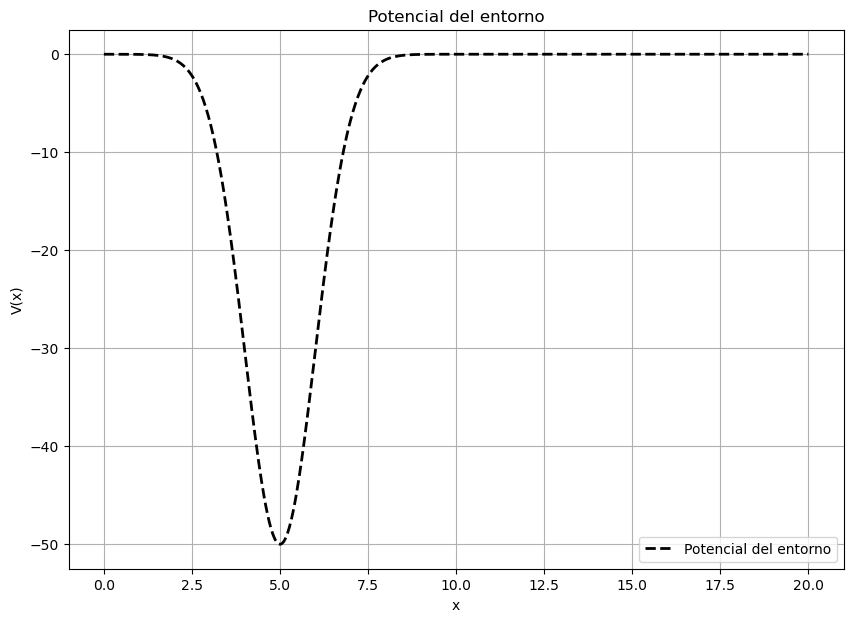

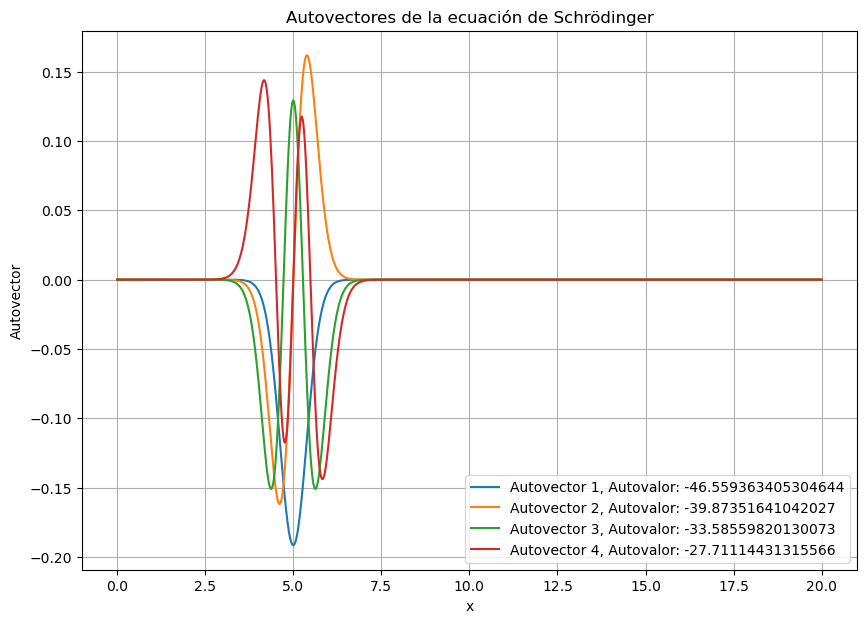

Loading...%


/var/folders/nz/rtdpw7510rz46ybxm78_3rnc0000gn/T/ipykernel_1696/1524684853.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  Schrodinger_prob[i, :] = (1/integral)*Schrodinger_prob[i, :]
/var/folders/nz/rtdpw7510rz46ybxm78_3rnc0000gn/T/ipykernel_1696/1524684853.py:12: RuntimeWarning: invalid value encountered in multiply
  Schrodinger_prob[i, :] = (1/integral)*Schrodinger_prob[i, :]
MovieWriter ffmpeg unavailable; using Pillow instead.


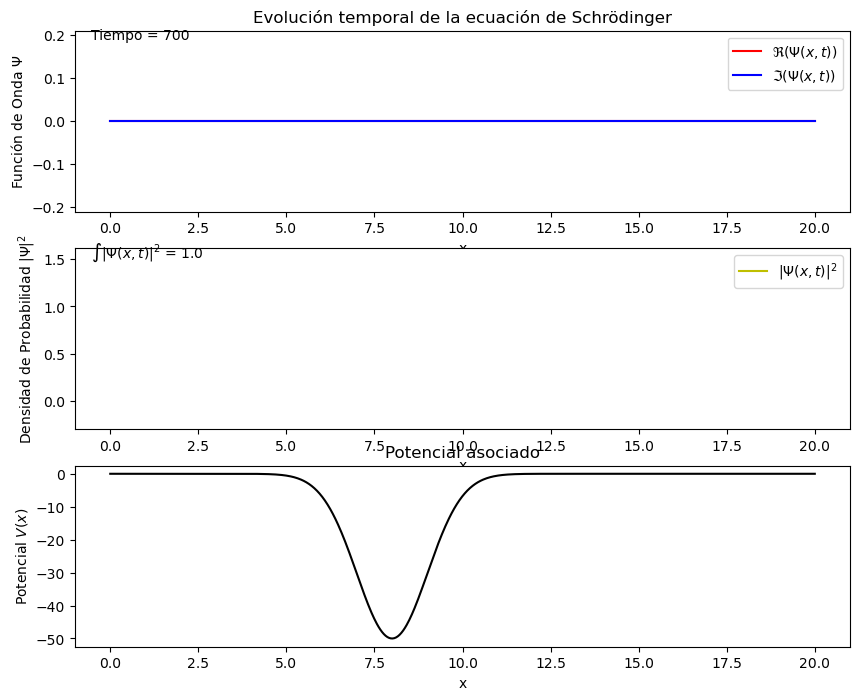

In [49]:
#Caso con pozo gaussiano a la derecha del intervalo
U0=50
L = 20
Nx = 800
NT = 700
x_bar=5
sigma2=1

#Consideramos pozo gaussiano para obtener Psi0 sujeto a condiciones iniciales
def U_gaus(t):
    return -U0*np.exp(-(np.abs(t-x_bar)**2)/2*sigma2)

x, eigenvalues, eigenvectors = solve_schrodinger_0(Nx,U_gaus,0,L, disp_U = True, disp_fun = [0,1,2,3], fig_size=(10,7))

#Creacion de Psi(x,t=0)
WavePsiTest2 = np.ravel(eigenvectors[:,0])
WavePsiTest2 = WavePsiTest2[1:-1]

#Potencial asociado
x_bar=8
sigma2=1
U0=50
def U_gaus(t):
    return -U0*np.exp(-(np.abs(t-x_bar)**2)/2*sigma2)


#Solución
Schrodinger_Matrix_Wave = solve_schrodinger_time(WavePsiTest2, Nx, NT, U_gaus, L)

#Simulación 
animar_soluciones(Schrodinger_Matrix_Wave, U_gaus, L, "Schrodinger_Pozo_Osc")

### Quantum tunneling

Consideramos como condición inicial $\Psi(x, t = 0)$ un paquete gaussiano de la forma

$$\Psi(x,t = 0) = e^{-(x-x_0)^2)/2 \sigma^2} e^{ik_0x}$$

Donde $x_0$ corresponde al centro de la onda, $k_0$ es el momento inicial de la onda y $\sigma^2$ es la varianza con la que se dispersa la onda.

La evolución de la ecuación para dicha condición inicial modela el efecto túnel, que es un fenómeno cuántico por el que una partícula viola los principios de la mecánica clásica penetrando una barrera de potencial o impedancia mayor que la energía cinética de la propia partícula

El efecto túnel juega un papel esencial en muchos fenómenos físicos como, por ejemplo, en la fusión nuclear que ocurre en la secuencia principal de estrellas como el Sol.1​ La energía que poseen los hidrones (catión hidrógeno) en el núcleo del Sol no es suficiente para superar la barrera de potencial que produce la repulsión electromagnética entre ellos. Gracias al efecto túnel, existe una pequeña probabilidad de que algunos hidrones la sobrepasen, produciendo la fusión de los mismos y liberando energía en forma de radiación electromagnética.2​ Aunque la probabilidad de que se produzca este efecto túnel es muy pequeña, la inmensa cantidad de partículas que componen el Sol hace que este efecto se produzca constantemente. Esto explica por qué cuanto más masiva es una estrella (como una supergigante azul), más corta es su secuencia principal, ya que la energía cinética de los hidrones es mayor y, en consecuencia, la probabilidad del efecto túnel también.3

### Ejemplo de paquete gaussiano

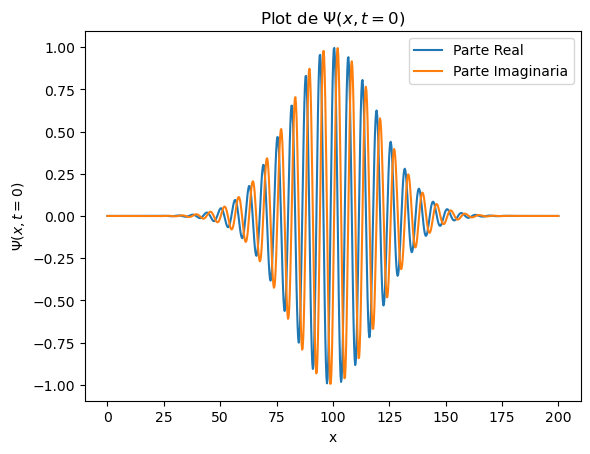

In [27]:
#x0 centro, k0 momentum, sigma varianza
L = 200
x_values = np.linspace(0,L,Nx)

def Wave_Packet(Nx, x0, k0, sigma, L):
    x = np.linspace(0,L,Nx)
    Wave = np.exp(-1/2* (x-x0)**2/sigma**2) *np.exp(1j*k0*x)
    return Wave

Wave = Wave_Packet(Nx, L/2, 1, 20, L)
plot_complexpsi0(Wave, L)


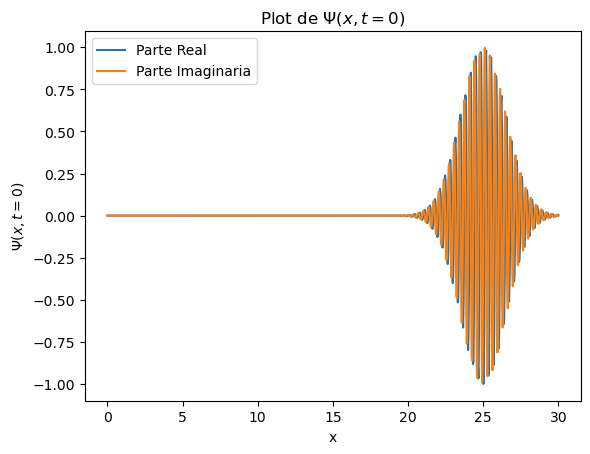

Loading...%


/var/folders/nz/rtdpw7510rz46ybxm78_3rnc0000gn/T/ipykernel_1696/1524684853.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  Schrodinger_prob[i, :] = (1/integral)*Schrodinger_prob[i, :]
/var/folders/nz/rtdpw7510rz46ybxm78_3rnc0000gn/T/ipykernel_1696/1524684853.py:12: RuntimeWarning: invalid value encountered in multiply
  Schrodinger_prob[i, :] = (1/integral)*Schrodinger_prob[i, :]
MovieWriter ffmpeg unavailable; using Pillow instead.


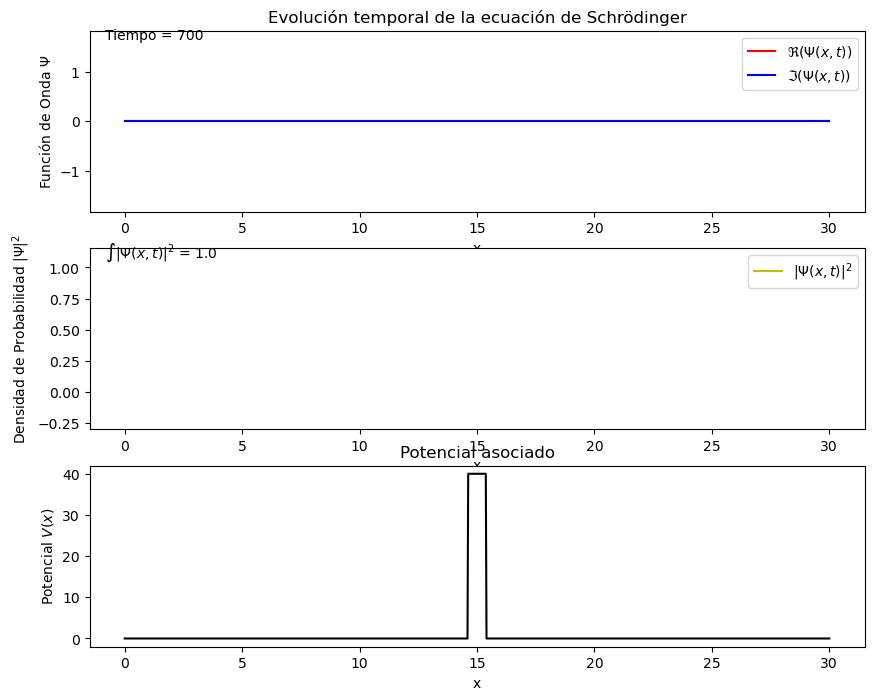

In [44]:
#Paquete Gaussiano

Nx = 1000
NT = 700
L = 30
a = L/2 - 0.5
b = L/2 + 0.5
x_values = np.linspace(0,L,Nx)

#x0 centro, k0 momentum, sigma varianza
def Wave_Packet(Nx, x0, k0, sigma, L):
    x = np.linspace(0,L,Nx)
    Wave = np.exp(-1/2* (x-x0)**2/sigma**2) *np.exp(1j*k0*x)
    return Wave

WaveG = Wave_Packet(Nx, 25, 400, 1.5, L)
plot_complexpsi0(WaveG, L)

def Indicatriz(x, U_0=40):
    return np.where((L/2-0.4 < x) & (x < L/2+0.4), U_0, 0)

#Solución
Schrodinger_Wave_Packet = solve_schrodinger_time(WaveG, Nx, NT, Indicatriz, L)
animar_soluciones(Schrodinger_Wave_Packet, Indicatriz, L, "Schrodinger_Tunneling")

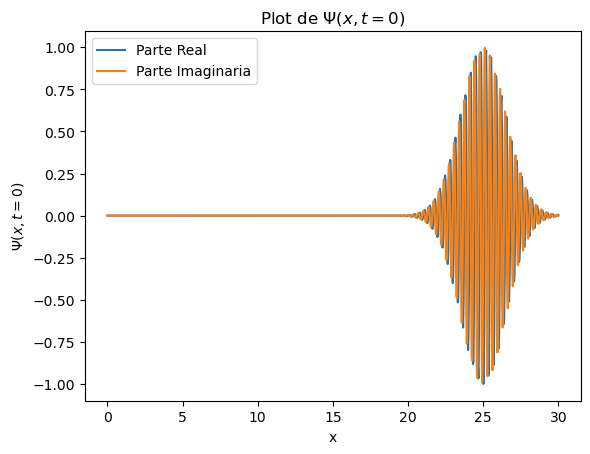

Loading...%


/var/folders/nz/rtdpw7510rz46ybxm78_3rnc0000gn/T/ipykernel_1696/1524684853.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  Schrodinger_prob[i, :] = (1/integral)*Schrodinger_prob[i, :]
/var/folders/nz/rtdpw7510rz46ybxm78_3rnc0000gn/T/ipykernel_1696/1524684853.py:12: RuntimeWarning: invalid value encountered in multiply
  Schrodinger_prob[i, :] = (1/integral)*Schrodinger_prob[i, :]
MovieWriter ffmpeg unavailable; using Pillow instead.


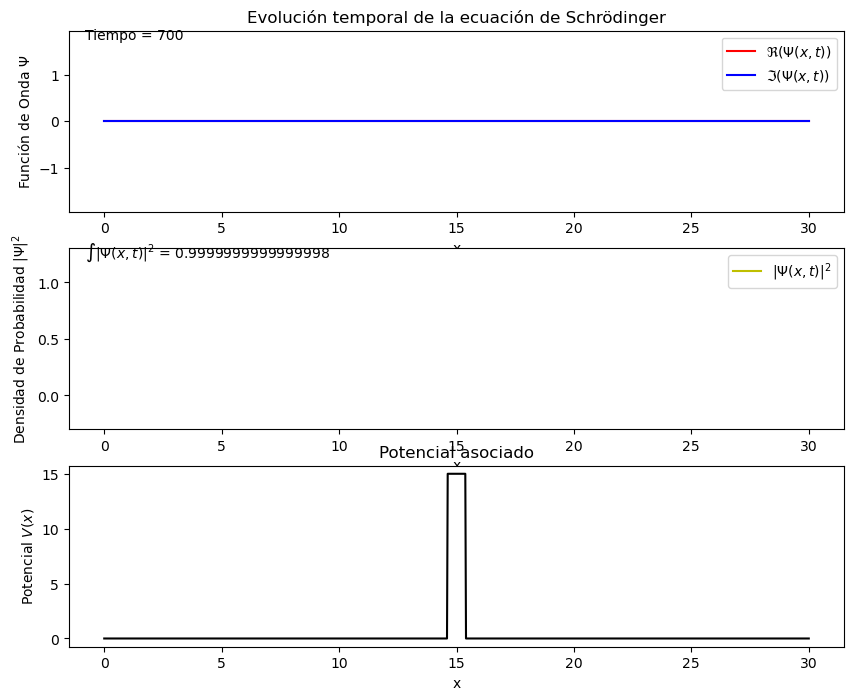

In [50]:
#Paquete Gaussiano

Nx = 1000
NT = 700
L = 30
x_values = np.linspace(0,L,Nx)

#Datos: x0 centro, k0 momentum, sigma varianza
def Wave_Packet(Nx, x0, k0, sigma, L):
    x = np.linspace(0,L,Nx)
    Wave = np.exp(-1/2* (x-x0)**2/sigma**2) *np.exp(1j*k0*x)
    return Wave

WaveG = Wave_Packet(Nx, 25, 400, 1.5, L)
plot_complexpsi0(WaveG, L)

def Indicatriz(x, U_0=15):
    return np.where((L/2-0.4 < x) & (x < L/2+0.4), U_0, 0)

#Solución
Schrodinger_Wave_Packet = solve_schrodinger_time(WaveG, Nx, NT, Indicatriz, L)
animar_soluciones(Schrodinger_Wave_Packet, Indicatriz, L, "Schrodinger_Tunneling_P")

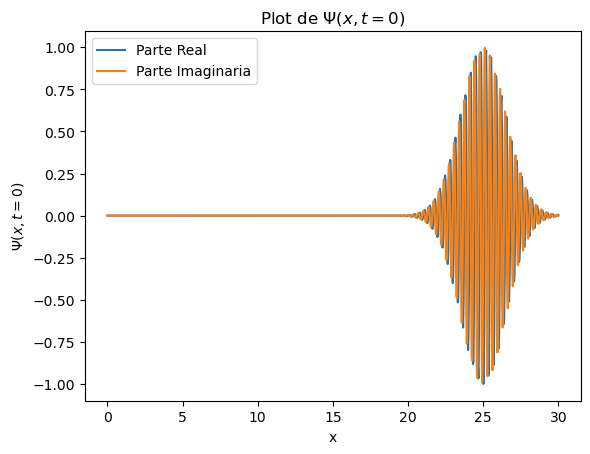

Loading...%


/var/folders/nz/rtdpw7510rz46ybxm78_3rnc0000gn/T/ipykernel_1696/1524684853.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  Schrodinger_prob[i, :] = (1/integral)*Schrodinger_prob[i, :]
/var/folders/nz/rtdpw7510rz46ybxm78_3rnc0000gn/T/ipykernel_1696/1524684853.py:12: RuntimeWarning: invalid value encountered in multiply
  Schrodinger_prob[i, :] = (1/integral)*Schrodinger_prob[i, :]
MovieWriter ffmpeg unavailable; using Pillow instead.


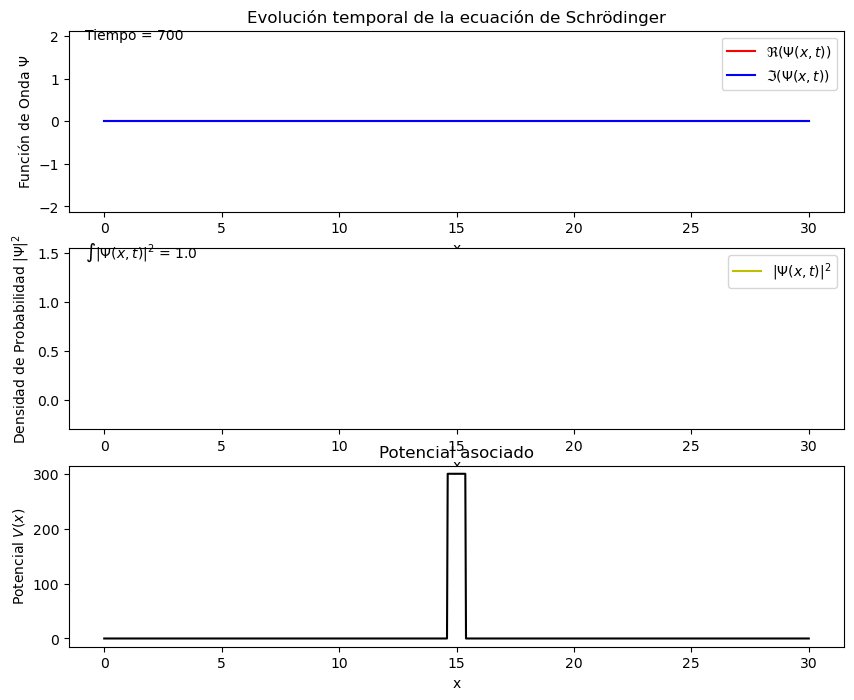

In [51]:
#Paquete Gaussiano

Nx = 1000
NT = 700
L = 30
x_values = np.linspace(0,L,Nx)

#Datos: x0 centro, k0 momentum, sigma varianza
def Wave_Packet(Nx, x0, k0, sigma, L):
    x = np.linspace(0,L,Nx)
    Wave = np.exp(-1/2* (x-x0)**2/sigma**2) *np.exp(1j*k0*x)
    return Wave

WaveG = Wave_Packet(Nx, 25, 400, 1.5, L)
plot_complexpsi0(WaveG, L)

def Indicatriz(x, U_0=300):
    return np.where((L/2-0.4 < x) & (x < L/2+0.4), U_0, 0)

#Solución
Schrodinger_Wave_Packet = solve_schrodinger_time(WaveG, Nx, NT, Indicatriz, L)
animar_soluciones(Schrodinger_Wave_Packet, Indicatriz, L, "Schrodinger_Tunneling_NP")